### MEDICAL INSURANCE COST ANALYSIS AND PREDICTION

#### LOAD AND IMPORT DATASET

In [1]:
#import libraries for the lab 
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#read csv and load dataset
filename = "medical_insurance_dataset.csv"
df = pd.read_csv(filename)
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [3]:
#add headers to the dataset 
headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
#replace ? with NaN 
df.replace('?', np.nan, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


#### DATA WRANGLING

In [5]:
#Handle missing data 
mean_age = df["age"].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

is_smoker = df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

df[["age", "smoker"]] = df[["age", "smoker"]].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


C:\Users\samar\AppData\Local\Temp\ipykernel_20136\493087515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].replace(np.nan, mean_age, inplace=True)
C:\Users\samar\AppData\Local\Temp\ipykernel_20136\493087515.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [7]:
df[["charges"]] = np.round(df[["charges"]], 2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


#### EXPLORATORY DATA ANALYSIS

(0.0, 66902.85800000001)

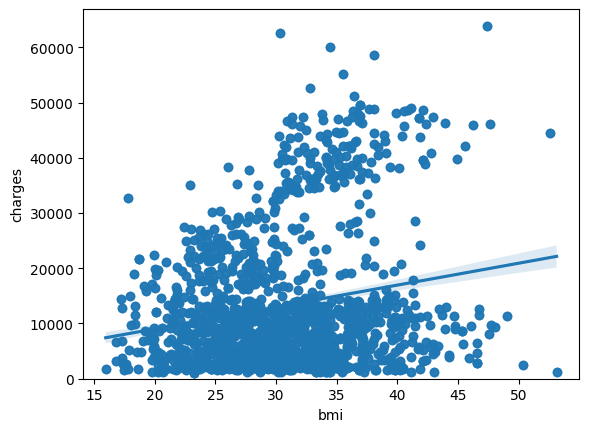

In [9]:
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0, )

In [10]:
df[["bmi", "charges"]].corr()

,bmi,charges
bmi,1.000000,0.199906
charges,0.199906,1.000000


<Axes: xlabel='smoker', ylabel='charges'>

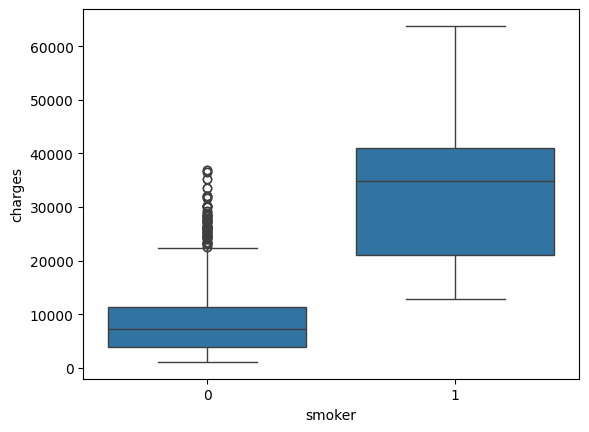

In [11]:
#box plot for categorical data 
sns.boxplot(x="smoker", y="charges", data=df)

In [12]:
df[["smoker", "charges"]].corr()

,smoker,charges
smoker,1.000000,0.789141
charges,0.789141,1.000000


In [13]:
#correlation for the whole dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


#### MODEL DEVELOPMENT

In [16]:
#MODEL DEVEOPMENT 

from sklearn.linear_model import LinearRegression

Y = df["charges"]
X = df[["smoker"]]

lre = LinearRegression()
lre.fit(X, Y)

lre.score(X, Y)

0.6227430402464125

In [18]:
Z = df.drop(columns=["charges"], axis=1)
Z.head()

lre1 = LinearRegression()
lre1.fit(Z, Y)

lre1.score(Z, Y)


0.7505888664568174

In [19]:
#Create a training pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype('float')
pipe.fit(Z,Y)
Ypipe = pipe.predict(Z)
r2_score(y_true=Y, y_pred=Ypipe)

0.8453715902635672

#### MODEL REFINEMENT

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("size of training sample: ", x_train.shape[0])
print("size of test sample: ", x_test.shape[0])

size of training sample:  2216
size of test sample:  555


In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X=x_train, y=y_train)
Yhat = ridge_reg.predict(X=x_test)
r2_score(y_true=y_test, y_pred=Yhat)

0.6290383685854769

In [26]:
#Polynomial Regression
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X=x_train)
x_test_pr = pr.fit_transform(X=x_test)
ridge_reg.fit(X=x_train_pr, y=y_train)
Yhat1 = ridge_reg.predict(X=x_test_pr)
r2_score(y_true=y_test, y_pred=Yhat1)

0.6290319571566714